# Предподготовка данных

In [1]:
import pandas as pd
import numpy as np

import datetime

In [2]:
df_train = pd.read_csv("data/train.csv")

In [3]:
tvr_18 = "Все 18+_TVR"
tvr_55 = "Все 55+_TVR"

share_18 = "Все 18+_Share"
share_55 = "Все 55+_Share"

df_train.columns

Index(['Unnamed: 0', 'Год', 'Месяц', 'День', 'Время', 'Канал', 'Все 18+_TVR',
       'Все 55+_TVR', 'Все 18+_Share', 'Все 55+_Share', 'Дата_День',
       'next_day', 'Дата'],
      dtype='object')

In [4]:
df_train["День"] = df_train["День"].apply(lambda x: int(x.split()[1]))

In [5]:
df_train["Канал"].value_counts()

РОССИЯ 1        14016
РЕН ТВ          14016
ПЕРВЫЙ КАНАЛ    14016
СТС             14016
ТНТ             14016
Name: Канал, dtype: int64

In [6]:
dates = np.array(df_train["Дата_День"])

df_train["day_datetime"] = df_train["Дата_День"].apply(lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"), "%Y-%m-%d"))
df_train["weekday"] = df_train["Дата_День"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").weekday())

In [7]:
df_train

,Unnamed: 0,Год,Месяц,День,Время,Канал,Все 18+_TVR,Все 55+_TVR,Все 18+_Share,Все 55+_Share,Дата_День,next_day,Дата,day_datetime,weekday
0,0,2018,Ноябрь,1,05:00:00 - 06:00:00,ПЕРВЫЙ КАНАЛ,0.21,0.12,5.23,2.00,2018-11-01 00:00:00,False,2018-11-01 05:00:00,2018-11-01,3
1,1,2018,Ноябрь,1,06:00:00 - 07:00:00,ПЕРВЫЙ КАНАЛ,0.71,0.33,11.23,4.90,2018-11-01 00:00:00,False,2018-11-01 06:00:00,2018-11-01,3
2,2,2018,Ноябрь,1,07:00:00 - 08:00:00,ПЕРВЫЙ КАНАЛ,1.10,0.59,14.58,6.49,2018-11-01 00:00:00,False,2018-11-01 07:00:00,2018-11-01,3
3,3,2018,Ноябрь,1,08:00:00 - 09:00:00,ПЕРВЫЙ КАНАЛ,0.96,0.94,10.41,7.41,2018-11-01 00:00:00,False,2018-11-01 08:00:00,2018-11-01,3
4,4,2018,Ноябрь,1,09:00:00 - 10:00:00,ПЕРВЫЙ КАНАЛ,1.94,3.81,17.54,21.51,2018-11-01 00:00:00,False,2018-11-01 09:00:00,2018-11-01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,87715,2020,Октябрь,31,24:00:00 - 25:00:00,ТНТ,1.17,0.39,6.08,1.65,2020-11-01 00:00:00,True,2020-11-01 00:00:00,2020-11-01,6
70076,87716,2020,Октябрь,31,25:00:00 - 26:00:00,ТНТ,0.79,0.01,6.45,0.06,2020-11-01 00:00:00,True,2020-11-01 01:00:00,2020-11-01,6
70077,87717,2020,Октябрь,31,26:00:00 - 27:00:00,ТНТ,0.04,0.03,0.53,0.28,2020-11-01 00:00:00,True,2020-11-01 02:00:00,2020-11-01,6
70078,87718,2020,Октябрь,31,27:00:00 - 28:00:00,ТНТ,0.23,0.37,4.71,5.79,2020-11-01 00:00:00,True,2020-11-01 03:00:00,2020-11-01,6


# Анализ

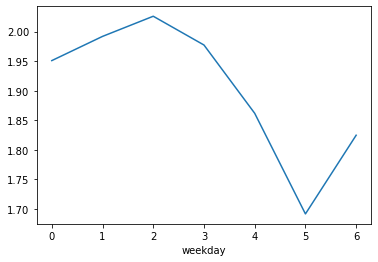

In [8]:
df_train[df_train["Канал"] == "ПЕРВЫЙ КАНАЛ"].groupby("weekday")[tvr_18].mean().plot()

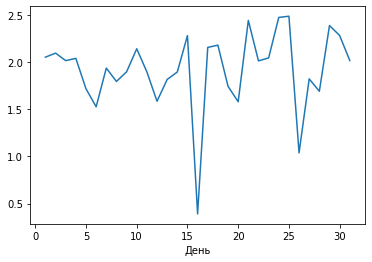

In [9]:
df_train[(df_train["Канал"] == "ПЕРВЫЙ КАНАЛ") & (df_train["Месяц"] == "Октябрь") & (df_train["Год"] == 2019)].groupby("День")[tvr_18].mean().plot()

## Данные с дополнительных источников

In [10]:
import requests
from bs4 import BeautifulSoup

### 1. Новостной сайт
Отсюда я беру суммарное количество просмотров на всех статьях за день

#### Скреппинг

In [11]:
url = "https://neftegaz.ru/archive/news/?date=01.10.2019"

request = requests.get(url)
request.ok

True

In [12]:
q = BeautifulSoup(request.text)
views_html = q.findAll("div", {"class": "views2"})

In [13]:
def int_check(x):
    try:
        int(str(x))
        return True
    except ValueError:
        return False

views = list(map(lambda x: list(map(lambda x: int(x), filter(lambda x_: int_check(x_), str(x).split("\t"))))[0], views_html))
views_sum = sum(views)
views_sum

63873

In [14]:
days = df_train["Дата_День"].apply(lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"), "%d.%m.%Y")).unique()
days

array(['01.11.2018', '03.11.2018', '04.11.2018', '06.11.2018',
       '07.11.2018', '08.11.2018', '10.11.2018', '11.11.2018',
       '12.11.2018', '13.11.2018', '14.11.2018', '16.11.2018',
       '18.11.2018', '20.11.2018', '21.11.2018', '22.11.2018',
       '23.11.2018', '25.11.2018', '26.11.2018', '27.11.2018',
       '28.11.2018', '29.11.2018', '01.12.2018', '03.12.2018',
       '04.12.2018', '05.12.2018', '06.12.2018', '08.12.2018',
       '09.12.2018', '10.12.2018', '11.12.2018', '12.12.2018',
       '13.12.2018', '14.12.2018', '15.12.2018', '17.12.2018',
       '18.12.2018', '19.12.2018', '21.12.2018', '22.12.2018',
       '23.12.2018', '24.12.2018', '25.12.2018', '27.12.2018',
       '29.12.2018', '30.12.2018', '31.12.2018', '01.01.2019',
       '02.01.2019', '03.01.2019', '04.01.2019', '05.01.2019',
       '06.01.2019', '07.01.2019', '08.01.2019', '09.01.2019',
       '11.01.2019', '12.01.2019', '13.01.2019', '14.01.2019',
       '15.01.2019', '16.01.2019', '17.01.2019', '18.01

In [15]:
views_month = []

for d in range(1, 30):
    url_ = "https://neftegaz.ru/archive/news/?date={0}.10.2020".format(str(d))
#     url_ = "https://neftegaz.ru/archive/news/?date={0}".format(str(days[dayIndex]))
    request_ = requests.get(url_)
    q_ = BeautifulSoup(request_.text)
    views_html_ = q_.findAll("div", {"class": "views2"})
    views_sum_ = sum(list(map(lambda x: list(map(lambda x: int(x), filter(lambda x_: int_check(x_), str(x).split("\t"))))[0], views_html_)))
    
    views_month.append(views_sum_)
    

#### Связь между количеством просмотров на новостном сайте и TVR на телеканале "Россия 1"

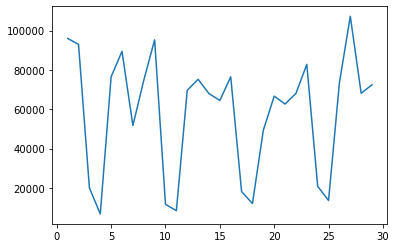

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1, 30), views_month)

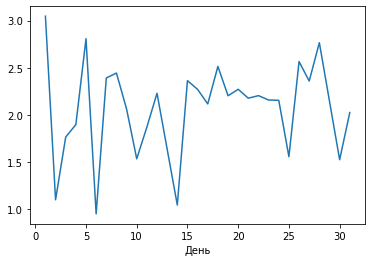

In [17]:
tvr_october2020 = df_train[(df_train["Канал"] == "РОССИЯ 1") & (df_train["Месяц"] == "Октябрь") & (df_train["Год"] == 2020)].groupby("День")[tvr_18].mean()
tvr_october2020.plot()

In [18]:
np.corrcoef(views_month, tvr_october2020)

array([[1.        , 0.08840921],
       [0.08840921, 1.        ]])

#### Сдвиг

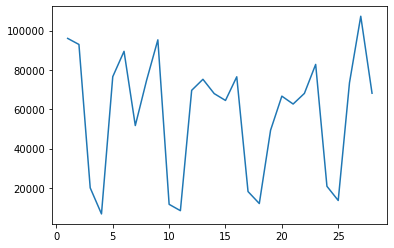

In [19]:
def make_shift_back(arr, shift = 1): # сдвиг назад
    return arr[:- shift]

def make_shift_forward(arr, shift = 1): # сдвиг вперед
    return arr[shift:]

plt.plot(range(1, 29), make_shift_back(views_month, 1))

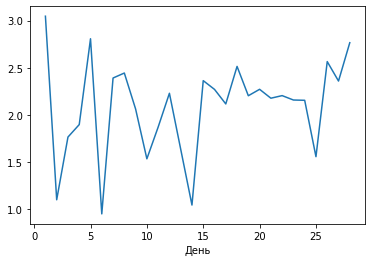

In [20]:
tvr_october2020 = df_train[(df_train["Канал"] == "РОССИЯ 1") & (df_train["Месяц"] == "Октябрь") & (df_train["Год"] == 2020)].groupby("День")[tvr_18].mean()
tvr_october2020[: -2].plot()

In [21]:
for i in range(1, 10):
    print(i, np.corrcoef(make_shift_back(views_month, i), tvr_october2020[i :]))

1 [[ 1.         -0.44620808]
 [-0.44620808  1.        ]]
2 [[1.         0.03030573]
 [0.03030573 1.        ]]
3 [[1.         0.28997399]
 [0.28997399 1.        ]]
4 [[ 1.         -0.20715603]
 [-0.20715603  1.        ]]
5 [[ 1.         -0.22027741]
 [-0.22027741  1.        ]]
6 [[1.         0.27904576]
 [0.27904576 1.        ]]
7 [[ 1.         -0.00792212]
 [-0.00792212  1.        ]]
8 [[ 1.         -0.31236828]
 [-0.31236828  1.        ]]
9 [[ 1.00000000e+00 -3.75874591e-04]
 [-3.75874591e-04  1.00000000e+00]]


#### Обработка всех дней df_train

Данные по всем днем тренировочной выборки получены с помощью скрипта get_views.py и загружены в data/news_data.txt

In [22]:
import json

all_views = {}

with open("data/news_data.txt", "r") as file:
    all_views = json.loads(file.read())

# Изменение формата дат
all_views = pd.Series(all_views)
all_views.index = list(map(lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, "%d.%m.%Y"), "%Y-%m-%d"), pd.Series(all_views).index))
all_views = all_views.to_dict()

In [23]:
df_train["news_views"] = list(map(lambda x: all_views[x], np.array(df_train["day_datetime"])))

In [24]:
df_train

,Unnamed: 0,Год,Месяц,День,Время,Канал,Все 18+_TVR,Все 55+_TVR,Все 18+_Share,Все 55+_Share,Дата_День,next_day,Дата,day_datetime,weekday,news_views
0,0,2018,Ноябрь,1,05:00:00 - 06:00:00,ПЕРВЫЙ КАНАЛ,0.21,0.12,5.23,2.00,2018-11-01 00:00:00,False,2018-11-01 05:00:00,2018-11-01,3,70884
1,1,2018,Ноябрь,1,06:00:00 - 07:00:00,ПЕРВЫЙ КАНАЛ,0.71,0.33,11.23,4.90,2018-11-01 00:00:00,False,2018-11-01 06:00:00,2018-11-01,3,70884
2,2,2018,Ноябрь,1,07:00:00 - 08:00:00,ПЕРВЫЙ КАНАЛ,1.10,0.59,14.58,6.49,2018-11-01 00:00:00,False,2018-11-01 07:00:00,2018-11-01,3,70884
3,3,2018,Ноябрь,1,08:00:00 - 09:00:00,ПЕРВЫЙ КАНАЛ,0.96,0.94,10.41,7.41,2018-11-01 00:00:00,False,2018-11-01 08:00:00,2018-11-01,3,70884
4,4,2018,Ноябрь,1,09:00:00 - 10:00:00,ПЕРВЫЙ КАНАЛ,1.94,3.81,17.54,21.51,2018-11-01 00:00:00,False,2018-11-01 09:00:00,2018-11-01,3,70884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,87715,2020,Октябрь,31,24:00:00 - 25:00:00,ТНТ,1.17,0.39,6.08,1.65,2020-11-01 00:00:00,True,2020-11-01 00:00:00,2020-11-01,6,10911
70076,87716,2020,Октябрь,31,25:00:00 - 26:00:00,ТНТ,0.79,0.01,6.45,0.06,2020-11-01 00:00:00,True,2020-11-01 01:00:00,2020-11-01,6,10911
70077,87717,2020,Октябрь,31,26:00:00 - 27:00:00,ТНТ,0.04,0.03,0.53,0.28,2020-11-01 00:00:00,True,2020-11-01 02:00:00,2020-11-01,6,10911
70078,87718,2020,Октябрь,31,27:00:00 - 28:00:00,ТНТ,0.23,0.37,4.71,5.79,2020-11-01 00:00:00,True,2020-11-01 03:00:00,2020-11-01,6,10911


In [25]:
news_views_r1 = df_train[df_train["Канал"] == "РОССИЯ 1"]["news_views"]
tvr_r1 = df_train[df_train["Канал"] == "РОССИЯ 1"][tvr_18]
np.corrcoef(news_views_r1, tvr_r1) # базовая корреляция

array([[1.        , 0.12906197],
       [0.12906197, 1.        ]])

In [26]:
for i in range(1, 7):
    print("---Shift: {0}---".format(i))
    print("Back shift correlation:\n {1}".format(i, np.corrcoef(make_shift_back(news_views_r1, i), tvr_r1[i :])))
    print("Forward shift correlation:\n {1}".format(i, np.corrcoef(make_shift_forward(news_views_r1, i), tvr_r1[: -i])))

---Shift: 1---
Back shift correlation:
 [[1.         0.12207634]
 [0.12207634 1.        ]]
Forward shift correlation:
 [[1.         0.13186702]
 [0.13186702 1.        ]]
---Shift: 2---
Back shift correlation:
 [[1.         0.11830992]
 [0.11830992 1.        ]]
Forward shift correlation:
 [[1.         0.13291738]
 [0.13291738 1.        ]]
---Shift: 3---
Back shift correlation:
 [[1.         0.11894313]
 [0.11894313 1.        ]]
Forward shift correlation:
 [[1.         0.13683708]
 [0.13683708 1.        ]]
---Shift: 4---
Back shift correlation:
 [[1.         0.12087597]
 [0.12087597 1.        ]]
Forward shift correlation:
 [[1.         0.13373749]
 [0.13373749 1.        ]]
---Shift: 5---
Back shift correlation:
 [[1.         0.12240844]
 [0.12240844 1.        ]]
Forward shift correlation:
 [[1.         0.12854264]
 [0.12854264 1.        ]]
---Shift: 6---
Back shift correlation:
 [[1.         0.12095197]
 [0.12095197 1.        ]]
Forward shift correlation:
 [[1.         0.12790146]
 [0.12

In [27]:
df_train["news_views_shift"] = make_shift_forward(df_train["news_views"], 3)

In [28]:
df_train

,Unnamed: 0,Год,Месяц,День,Время,Канал,Все 18+_TVR,Все 55+_TVR,Все 18+_Share,Все 55+_Share,Дата_День,next_day,Дата,day_datetime,weekday,news_views,news_views_shift
0,0,2018,Ноябрь,1,05:00:00 - 06:00:00,ПЕРВЫЙ КАНАЛ,0.21,0.12,5.23,2.00,2018-11-01 00:00:00,False,2018-11-01 05:00:00,2018-11-01,3,70884,NaN
1,1,2018,Ноябрь,1,06:00:00 - 07:00:00,ПЕРВЫЙ КАНАЛ,0.71,0.33,11.23,4.90,2018-11-01 00:00:00,False,2018-11-01 06:00:00,2018-11-01,3,70884,NaN
2,2,2018,Ноябрь,1,07:00:00 - 08:00:00,ПЕРВЫЙ КАНАЛ,1.10,0.59,14.58,6.49,2018-11-01 00:00:00,False,2018-11-01 07:00:00,2018-11-01,3,70884,NaN
3,3,2018,Ноябрь,1,08:00:00 - 09:00:00,ПЕРВЫЙ КАНАЛ,0.96,0.94,10.41,7.41,2018-11-01 00:00:00,False,2018-11-01 08:00:00,2018-11-01,3,70884,70884.0
4,4,2018,Ноябрь,1,09:00:00 - 10:00:00,ПЕРВЫЙ КАНАЛ,1.94,3.81,17.54,21.51,2018-11-01 00:00:00,False,2018-11-01 09:00:00,2018-11-01,3,70884,70884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,87715,2020,Октябрь,31,24:00:00 - 25:00:00,ТНТ,1.17,0.39,6.08,1.65,2020-11-01 00:00:00,True,2020-11-01 00:00:00,2020-11-01,6,10911,10911.0
70076,87716,2020,Октябрь,31,25:00:00 - 26:00:00,ТНТ,0.79,0.01,6.45,0.06,2020-11-01 00:00:00,True,2020-11-01 01:00:00,2020-11-01,6,10911,10911.0
70077,87717,2020,Октябрь,31,26:00:00 - 27:00:00,ТНТ,0.04,0.03,0.53,0.28,2020-11-01 00:00:00,True,2020-11-01 02:00:00,2020-11-01,6,10911,10911.0
70078,87718,2020,Октябрь,31,27:00:00 - 28:00:00,ТНТ,0.23,0.37,4.71,5.79,2020-11-01 00:00:00,True,2020-11-01 03:00:00,2020-11-01,6,10911,10911.0


Лучший сдвиг - сдвиг вперед на 3 дня

### 2. Погода

#### Скреппинг

In [29]:
from selenium import webdriver
import time

driver = webdriver.Chrome(executable_path = "/home/egoluback/Documents/NTI/2_stage/ML/2_stage/task2/scrapping/chromedriver")

In [30]:
url_meteopost = "https://www.gismeteo.ru/diary/4079/"

driver.get(url_meteopost)

In [31]:
driver.find_element_by_xpath("//select[@name = 'sd_distr']/option[text() = 'Москва (город федерального значения)']").click()

driver.find_element_by_xpath("//select[@name = 'Month']/option[text() = 'Октябрь']").click()

driver.find_element_by_xpath("//select[@name = 'Year']/option[text() = '2018']").click()

driver.find_element_by_xpath("//select[@name = 'sd_city']/option[text() = 'Москва']").click()

driver.find_element_by_xpath("//button[@id = 'selector_go_btn']").click()

In [32]:
weather_pd = pd.read_html(driver.find_element_by_xpath('//table').get_attribute('outerHTML'))[0]

In [33]:
temp_day = pd.Series(weather_pd['День']['Температура'], name = "temp_day")
temp_night = pd.Series(weather_pd['Вечер']['Температура'], name = "temp_night")

result_temp = pd.merge(temp_day, temp_night, right_index = True, left_index = True)

result_temp

,temp_day,temp_night
0,14,8
1,10,9
2,10,8
3,7,6
4,7,6
5,13,12
6,16,15
7,7,1
8,9,6
9,13,12


Данные по всем днем тренировочной выборки получены с помощью скрипта get_weather_gismeteo.py и загружены в data/weather_data.txt

In [34]:
weather_data = []

with open("data/weather_data.txt", "rb") as file:
    weather_data = json.loads(file.read())

Подсчет nan'ов

In [35]:
dataset_Moscow = pd.DataFrame(weather_data["Москва"])

for elIndex in range(len(list(dataset_Moscow[2]))):
    nans_sum_night = np.isnan(np.array(list(list(dataset_Moscow[2])[elIndex]["temp_night"].values()))).sum()
    nans_sum_day = np.isnan(np.array(list(list(dataset_Moscow[2])[elIndex]["temp_day"].values()))).sum()
    if ((nans_sum_day + nans_sum_night) > 0):
        print("---nans detected---")
        print("Summary: {0}".format(nans_sum_day + nans_sum_night))
        print("Year: {0}; Month: {1}.".format(dataset_Moscow[0][elIndex], dataset_Moscow[1][elIndex]))

---nans detected---
Summary: 1
Year: 2018; Month: 4.
---nans detected---
Summary: 1
Year: 2018; Month: 9.
---nans detected---
Summary: 2
Year: 2019; Month: 7.
---nans detected---
Summary: 1
Year: 2020; Month: 5.
---nans detected---
Summary: 1
Year: 2020; Month: 7.


In [36]:
def time_check(hour):
    if (hour >= 9 and hour <= 17): return "day"
    else: return "night"

days_time = df_train["Дата"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

days_daytime = pd.Series(days_time.apply(lambda x: time_check(x.hour)), name = "time")

days_year = pd.Series(days_time.apply(lambda x: x.year), name = "year")
days_month = pd.Series(days_time.apply(lambda x: x.month), name = "month")
days_day = pd.Series(days_time.apply(lambda x: x.day), name = "day")

days_ymd = pd.merge(pd.merge(days_year, days_month, right_index = True, left_index = True), days_day, right_index = True, left_index = True)

days_full = pd.merge(days_ymd, days_daytime, right_index = True, left_index = True)

days_full["temp"] = np.empty(len(days_full["year"]))

days_full["temp"][:] = np.nan

days_full

<ipython-input-36-79bbcbe6f75a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_full["temp"][:] = np.nan


,year,month,day,time,temp
0,2018,11,1,night,NaN
1,2018,11,1,night,NaN
2,2018,11,1,night,NaN
3,2018,11,1,night,NaN
4,2018,11,1,day,NaN
...,...,...,...,...,...
70075,2020,11,1,night,NaN
70076,2020,11,1,night,NaN
70077,2020,11,1,night,NaN
70078,2020,11,1,night,NaN


In [37]:
weather_Moscow = pd.DataFrame(weather_data["Москва"])

days_full_Moscow = days_full.copy()

for year in [2018, 2019, 2020]:
    for monthIndex in range(12):
        temp_df = pd.DataFrame(weather_Moscow[(weather_Moscow[0] == year) & (weather_Moscow[1] == monthIndex + 1)][2].iloc[0])
        days_this = days_full_Moscow[(days_full_Moscow["year"] == year) & (days_full_Moscow["month"] == monthIndex + 1)]
        if (len(days_this) != 0):
            for day in set(days_this["day"]):
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "night"), "temp"] = temp_df.iloc[day - 1]["temp_night"]
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "day"), "temp"] = temp_df.iloc[day - 1]["temp_day"]
        days_full_Moscow[(days_full_Moscow["year"] == year) & (days_full_Moscow["month"] == monthIndex + 1)] = days_this

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [38]:
days_full_Moscow["temp"] = days_full_Moscow["temp"].fillna(method = "ffill")
df_train["temp_Moscow"] = days_full_Moscow["temp"]

In [39]:
weather_Peter = pd.DataFrame(weather_data["Санкт-Петербург"])

days_full_Peter = days_full.copy()

for year in [2018, 2019, 2020]:
    for monthIndex in range(12):
        temp_df = pd.DataFrame(weather_Peter[(weather_Peter[0] == year) & (weather_Peter[1] == monthIndex + 1)][2].iloc[0])
        days_this = days_full_Peter[(days_full_Peter["year"] == year) & (days_full_Peter["month"] == monthIndex + 1)]
        if (len(days_this) != 0):
            for day in set(days_this["day"]):
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "night"), "temp"] = temp_df.iloc[day - 1]["temp_night"]
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "day"), "temp"] = temp_df.iloc[day - 1]["temp_day"]
        days_full_Peter[(days_full_Peter["year"] == year) & (days_full_Peter["month"] == monthIndex + 1)] = days_this

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [40]:
days_full_Peter["temp"] = days_full_Peter["temp"].fillna(method = "ffill")
df_train["temp_Peter"] = days_full_Peter["temp"]

In [41]:
weather_Novosib = pd.DataFrame(weather_data["Новосибирск"])

days_full_Novosib = days_full.copy()

for year in [2018, 2019, 2020]:
    for monthIndex in range(12):
        temp_df = pd.DataFrame(weather_Novosib[(weather_Novosib[0] == year) & (weather_Novosib[1] == monthIndex + 1)][2].iloc[0])
        days_this = days_full_Novosib[(days_full_Novosib["year"] == year) & (days_full_Novosib["month"] == monthIndex + 1)]
        if (len(days_this) != 0):
            for day in set(days_this["day"]):
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "night"), "temp"] = temp_df.iloc[day - 1]["temp_night"]
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "day"), "temp"] = temp_df.iloc[day - 1]["temp_day"]
        days_full_Novosib[(days_full_Novosib["year"] == year) & (days_full_Novosib["month"] == monthIndex + 1)] = days_this

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [42]:
days_full_Novosib["temp"] = days_full_Novosib["temp"].fillna(method = "ffill")
df_train["temp_Novosib"] = days_full_Novosib["temp"]

In [259]:
weather_Ekb = pd.DataFrame(weather_data["Екатеринбург"])

days_full_Ekb = days_full.copy()

for year in [2018, 2019, 2020]:
    for monthIndex in range(12):
        temp_df = pd.DataFrame(weather_Ekb[(weather_Ekb[0] == year) & (weather_Ekb[1] == monthIndex + 1)][2].iloc[0])
        days_this = days_full_Ekb[(days_full_Ekb["year"] == year) & (days_full_Ekb["month"] == monthIndex + 1)]
        if (len(days_this) != 0):
            for day in set(days_this["day"]):
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "night"), "temp"] = temp_df.iloc[day - 1]["temp_night"]
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "day"), "temp"] = temp_df.iloc[day - 1]["temp_day"]
        days_full[(days_full_Ekb["year"] == year) & (days_full_Ekb["month"] == monthIndex + 1)] = days_this

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [260]:
days_full_Ekb["temp"] = days_full_Ekb["temp"].fillna(method = "ffill")
df_train["temp_Ekb"] = days_full_Ekb["temp"]

In [261]:
df_train[df_train.columns[15:]]

,news_views,news_views_shift,temp_Moscow,temp_Peter,temp_Novosib,temp_Ekb,searches
0,70884,NaN,5.0,8.0,-7.0,-2.0,81.0
1,70884,NaN,5.0,8.0,-7.0,-2.0,81.0
2,70884,NaN,5.0,8.0,-7.0,-2.0,81.0
3,70884,70884.0,5.0,8.0,-7.0,-2.0,81.0
4,70884,70884.0,5.0,10.0,-7.0,-1.0,81.0
...,...,...,...,...,...,...,...
70075,10911,10911.0,4.0,0.0,2.0,-1.0,60.0
70076,10911,10911.0,4.0,0.0,2.0,-1.0,60.0
70077,10911,10911.0,4.0,0.0,2.0,-1.0,60.0
70078,10911,10911.0,4.0,0.0,2.0,-1.0,60.0


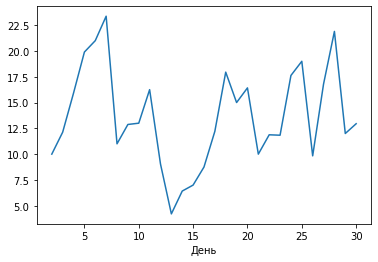

In [262]:
data_month = df_train[(df_train["Канал"] == "СТС") & (df_train["Месяц"] == "Май") & (df_train["Год"] == 2019)].groupby("День")
data_month["temp_Novosib"].mean().plot()

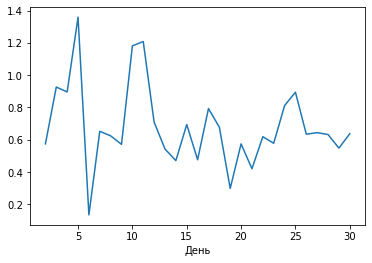

In [263]:
data_month[tvr_18].mean().plot()

In [264]:
np.corrcoef(data_month["temp_Novosib"].mean(), data_month[tvr_18].mean())

array([[1.       , 0.2067084],
       [0.2067084, 1.       ]])

### 3. Поисковые запросы

In [265]:
df_wo_init = pd.read_csv("data/searches_wo.csv")

df_wo = pd.DataFrame(np.array([list(df_wo_init["Категория: Все категории"].index)[1 :], list(df_wo_init["Категория: Все категории"])[1 :]]).T, columns = ["week", "searches"])
df_wo

,week,searches
0,2018-01-07,100
1,2018-01-14,93
2,2018-01-21,95
3,2018-01-28,93
4,2018-02-04,92
...,...,...
151,2020-11-29,55
152,2020-12-06,54
153,2020-12-13,54
154,2020-12-20,50


In [266]:
weeks_time = df_wo["week"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

weeks_year = pd.Series(weeks_time.apply(lambda x: x.year), name = "year")
weeks_month = pd.Series(weeks_time.apply(lambda x: x.month), name = "month")
weeks_day = pd.Series(weeks_time.apply(lambda x: x.day), name = "day")

weeks_ymd = pd.merge(pd.merge(weeks_year, weeks_month, right_index = True, left_index = True), weeks_day, right_index = True, left_index = True)

df_wo = pd.merge(df_wo, weeks_ymd, right_index = True, left_index = True)

df_wo

,week,searches,year,month,day
0,2018-01-07,100,2018,1,7
1,2018-01-14,93,2018,1,14
2,2018-01-21,95,2018,1,21
3,2018-01-28,93,2018,1,28
4,2018-02-04,92,2018,2,4
...,...,...,...,...,...
151,2020-11-29,55,2020,11,29
152,2020-12-06,54,2020,12,6
153,2020-12-13,54,2020,12,13
154,2020-12-20,50,2020,12,20


In [267]:
datas_searches = pd.DataFrame(pd.date_range(start = "2018-01-01", end = "2021-01-01"), columns = ["date"])

datas_searches["searches"] = np.empty(len(datas_searches["date"]))
datas_searches["searches"][:] = np.nan

<ipython-input-267-860ce42ecf18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_searches["searches"][:] = np.nan


In [268]:
current_searches = df_wo["searches"][0]

for dataIndex in range(len(list(datas_searches["date"]))):
    date_str = datetime.datetime.strftime(datas_searches["date"].iloc[dataIndex], "%Y-%m-%d")
    
    if (len(df_wo[df_wo["week"] == date_str]) > 0):
        current_searches = df_wo[df_wo["week"] == date_str]["searches"]  
        
    datas_searches["searches"][dataIndex] = current_searches

<ipython-input-268-822764c10fc2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_searches["searches"][dataIndex] = current_searches


In [269]:
# datas_searches["date"] = datas_searches["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

datas_searches

,date,searches
0,2018-01-01,100.0
1,2018-01-02,100.0
2,2018-01-03,100.0
3,2018-01-04,100.0
4,2018-01-05,100.0
...,...,...
1092,2020-12-28,63.0
1093,2020-12-29,63.0
1094,2020-12-30,63.0
1095,2020-12-31,63.0


In [270]:
days_time = df_train["Дата"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

days_year = pd.Series(days_time.apply(lambda x: x.year), name = "year")
days_month = pd.Series(days_time.apply(lambda x: x.month), name = "month")
days_day = pd.Series(days_time.apply(lambda x: x.day), name = "day")

days_fullymd = pd.merge(pd.merge(days_year, days_month, right_index = True, left_index = True), days_day, right_index = True, left_index = True)

days_fullymd["searches"] = np.empty(len(days_fullymd["year"]))
days_fullymd["searches"][:] = np.nan


# days_time_searches = datas_searches["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

datas_searches["year"] = pd.Series(datas_searches["date"].apply(lambda x: x.year), name = "year")
datas_searches["month"] = pd.Series(datas_searches["date"].apply(lambda x: x.month), name = "month")
datas_searches["day"] = pd.Series(datas_searches["date"].apply(lambda x: x.day), name = "day")

days_fullymd, datas_searches

<ipython-input-270-3555e9242306>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_fullymd["searches"][:] = np.nan


(       year  month  day  searches
 0      2018     11    1       NaN
 1      2018     11    1       NaN
 2      2018     11    1       NaN
 3      2018     11    1       NaN
 4      2018     11    1       NaN
 ...     ...    ...  ...       ...
 70075  2020     11    1       NaN
 70076  2020     11    1       NaN
 70077  2020     11    1       NaN
 70078  2020     11    1       NaN
 70079  2020     11    1       NaN
 
 [70080 rows x 4 columns],
            date  searches  year  month  day
 0    2018-01-01     100.0  2018      1    1
 1    2018-01-02     100.0  2018      1    2
 2    2018-01-03     100.0  2018      1    3
 3    2018-01-04     100.0  2018      1    4
 4    2018-01-05     100.0  2018      1    5
 ...         ...       ...   ...    ...  ...
 1092 2020-12-28      63.0  2020     12   28
 1093 2020-12-29      63.0  2020     12   29
 1094 2020-12-30      63.0  2020     12   30
 1095 2020-12-31      63.0  2020     12   31
 1096 2021-01-01      63.0  2021      1    1
 
 [1097 ro

In [271]:
for year in [2018, 2019, 2020]:
    for monthIndex in range(12):
        searches_df = datas_searches[(datas_searches["year"] == year) & (datas_searches["month"] == monthIndex + 1)]
        days_this = days_fullymd[(days_fullymd["year"] == year) & (days_fullymd["month"] == monthIndex + 1)]
        if (len(days_this) != 0):
            for day in set(days_this["day"]):
                searches_ = searches_df.loc[searches_df["day"] == day, "searches"]
                if (len(searches_) == 0): continue
                print(searches_df.loc[searches_df["day"] == day, "searches"])
                days_this.loc[days_this["day"] == day, "searches"] = list(searches_)[0]
        days_fullymd[(days_fullymd["year"] == year) & (days_fullymd["month"] == monthIndex + 1)] = days_this


/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

304    81.0
Name: searches, dtype: float64
306    81.0
Name: searches, dtype: float64
307    82.0
Name: searches, dtype: float64
309    82.0
Name: searches, dtype: float64
310    82.0
Name: searches, dtype: float64
311    82.0
Name: searches, dtype: float64
313    82.0
Name: searches, dtype: float64
314    80.0
Name: searches, dtype: float64
315    80.0
Name: searches, dtype: float64
316    80.0
Name: searches, dtype: float64
317    80.0
Name: searches, dtype: float64
319    80.0
Name: searches, dtype: float64
321    69.0
Name: searches, dtype: float64
323    69.0
Name: searches, dtype: float64
324    69.0
Name: searches, dtype: float64
325    69.0
Name: searches, dtype: float64
326    69.0
Name: searches, dtype: float64
328    71.0
Name: searches, dtype: float64
329    71.0
Name: searches, dtype: float64
330    71.0
Name: searches, dtype: float64
331    71.0
Name: searches, dtype: float64
332    71.0
Name: searches, dtype: float64
334    71.0
Name: searches, dtype: float64
336    72.0

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

411    68.0
Name: searches, dtype: float64
412    67.0
Name: searches, dtype: float64
413    67.0
Name: searches, dtype: float64
414    67.0
Name: searches, dtype: float64
415    67.0
Name: searches, dtype: float64
416    67.0
Name: searches, dtype: float64
417    67.0
Name: searches, dtype: float64
419    69.0
Name: searches, dtype: float64
420    69.0
Name: searches, dtype: float64
421    69.0
Name: searches, dtype: float64
422    69.0
Name: searches, dtype: float64
423    69.0
Name: searches, dtype: float64
425    69.0
Name: searches, dtype: float64
426    70.0
Name: searches, dtype: float64
428    70.0
Name: searches, dtype: float64
430    70.0
Name: searches, dtype: float64
431    70.0
Name: searches, dtype: float64
432    70.0
Name: searches, dtype: float64
433    65.0
Name: searches, dtype: float64
434    65.0
Name: searches, dtype: float64
435    65.0
Name: searches, dtype: float64
436    65.0
Name: searches, dtype: float64
437    65.0
Name: searches, dtype: float64
439    65.0

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

483    81.0
Name: searches, dtype: float64
484    81.0
Name: searches, dtype: float64
487    81.0
Name: searches, dtype: float64
488    81.0
Name: searches, dtype: float64
489    71.0
Name: searches, dtype: float64
491    71.0
Name: searches, dtype: float64
493    71.0
Name: searches, dtype: float64
494    71.0
Name: searches, dtype: float64
495    71.0
Name: searches, dtype: float64
496    62.0
Name: searches, dtype: float64
497    62.0
Name: searches, dtype: float64
498    62.0
Name: searches, dtype: float64
500    62.0
Name: searches, dtype: float64
501    62.0
Name: searches, dtype: float64
502    62.0
Name: searches, dtype: float64
504    68.0
Name: searches, dtype: float64
506    68.0
Name: searches, dtype: float64
507    68.0
Name: searches, dtype: float64
508    68.0
Name: searches, dtype: float64
509    68.0
Name: searches, dtype: float64
510    64.0
Name: searches, dtype: float64
511    64.0
Name: searches, dtype: float64
512    64.0
Name: searches, dtype: float64
514    64.0

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

553    70.0
Name: searches, dtype: float64
554    70.0
Name: searches, dtype: float64
556    70.0
Name: searches, dtype: float64
557    70.0
Name: searches, dtype: float64
558    70.0
Name: searches, dtype: float64
560    71.0
Name: searches, dtype: float64
562    71.0
Name: searches, dtype: float64
563    71.0
Name: searches, dtype: float64
564    71.0
Name: searches, dtype: float64
565    71.0
Name: searches, dtype: float64
567    67.0
Name: searches, dtype: float64
569    67.0
Name: searches, dtype: float64
570    67.0
Name: searches, dtype: float64
572    67.0
Name: searches, dtype: float64
573    67.0
Name: searches, dtype: float64
574    67.0
Name: searches, dtype: float64
575    67.0
Name: searches, dtype: float64
577    67.0
Name: searches, dtype: float64
579    67.0
Name: searches, dtype: float64
580    65.0
Name: searches, dtype: float64
581    65.0
Name: searches, dtype: float64
582    65.0
Name: searches, dtype: float64
585    65.0
Name: searches, dtype: float64
586    65.0

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a


610    59.0
Name: searches, dtype: float64
611    59.0
Name: searches, dtype: float64
612    59.0
Name: searches, dtype: float64
613    59.0
Name: searches, dtype: float64
614    59.0
Name: searches, dtype: float64
615    53.0
Name: searches, dtype: float64
616    53.0
Name: searches, dtype: float64
618    53.0
Name: searches, dtype: float64
619    53.0
Name: searches, dtype: float64
620    53.0
Name: searches, dtype: float64
622    57.0
Name: searches, dtype: float64
624    57.0
Name: searches, dtype: float64
625    57.0
Name: searches, dtype: float64
626    57.0
Name: searches, dtype: float64
627    57.0
Name: searches, dtype: float64
628    57.0
Name: searches, dtype: float64
630    59.0
Name: searches, dtype: float64
631    59.0
Name: searches, dtype: float64
632    59.0
Name: searches, dtype: float64
633    59.0
Name: searches, dtype: float64
636    62.0
Name: searches, dtype: float64
637    62.0
Name: searches, dtype: float64
638    62.0
Name: searches, dtype: float64
639    62.

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a


656    64.0
Name: searches, dtype: float64
657    66.0
Name: searches, dtype: float64
658    66.0
Name: searches, dtype: float64
659    66.0
Name: searches, dtype: float64
660    66.0
Name: searches, dtype: float64
661    66.0
Name: searches, dtype: float64
662    66.0
Name: searches, dtype: float64
664    69.0
Name: searches, dtype: float64
665    69.0
Name: searches, dtype: float64
666    69.0
Name: searches, dtype: float64
667    69.0
Name: searches, dtype: float64
668    69.0
Name: searches, dtype: float64
669    69.0
Name: searches, dtype: float64
670    69.0
Name: searches, dtype: float64
671    71.0
Name: searches, dtype: float64
672    71.0
Name: searches, dtype: float64
673    71.0
Name: searches, dtype: float64
674    71.0
Name: searches, dtype: float64
675    71.0
Name: searches, dtype: float64
676    71.0
Name: searches, dtype: float64
677    71.0
Name: searches, dtype: float64
679    65.0
Name: searches, dtype: float64
680    65.0
Name: searches, dtype: float64
682    65.

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a


711    60.0
Name: searches, dtype: float64
713    60.0
Name: searches, dtype: float64
714    60.0
Name: searches, dtype: float64
715    60.0
Name: searches, dtype: float64
716    60.0
Name: searches, dtype: float64
717    60.0
Name: searches, dtype: float64
718    60.0
Name: searches, dtype: float64
719    60.0
Name: searches, dtype: float64
720    61.0
Name: searches, dtype: float64
722    61.0
Name: searches, dtype: float64
723    61.0
Name: searches, dtype: float64
724    61.0
Name: searches, dtype: float64
725    61.0
Name: searches, dtype: float64
726    61.0
Name: searches, dtype: float64
727    82.0
Name: searches, dtype: float64
728    82.0
Name: searches, dtype: float64
730    82.0
Name: searches, dtype: float64
731    82.0
Name: searches, dtype: float64
732    82.0
Name: searches, dtype: float64
733    82.0
Name: searches, dtype: float64
735    80.0
Name: searches, dtype: float64
736    80.0
Name: searches, dtype: float64
737    80.0
Name: searches, dtype: float64
738    80.

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

753    64.0
Name: searches, dtype: float64
754    64.0
Name: searches, dtype: float64
756    60.0
Name: searches, dtype: float64
757    60.0
Name: searches, dtype: float64
758    60.0
Name: searches, dtype: float64
759    60.0
Name: searches, dtype: float64
760    60.0
Name: searches, dtype: float64
762    63.0
Name: searches, dtype: float64
763    63.0
Name: searches, dtype: float64
764    63.0
Name: searches, dtype: float64
766    63.0
Name: searches, dtype: float64
767    63.0
Name: searches, dtype: float64
768    63.0
Name: searches, dtype: float64
769    64.0
Name: searches, dtype: float64
770    64.0
Name: searches, dtype: float64
771    64.0
Name: searches, dtype: float64
772    64.0
Name: searches, dtype: float64
775    64.0
Name: searches, dtype: float64
776    62.0
Name: searches, dtype: float64
777    62.0
Name: searches, dtype: float64
778    62.0
Name: searches, dtype: float64
782    62.0
Name: searches, dtype: float64
783    64.0
Name: searches, dtype: float64
784    64.0

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

790    58.0
Name: searches, dtype: float64
791    58.0
Name: searches, dtype: float64
792    58.0
Name: searches, dtype: float64
793    58.0
Name: searches, dtype: float64
796    58.0
Name: searches, dtype: float64
797    61.0
Name: searches, dtype: float64
798    61.0
Name: searches, dtype: float64
799    61.0
Name: searches, dtype: float64
801    61.0
Name: searches, dtype: float64
802    61.0
Name: searches, dtype: float64
803    61.0
Name: searches, dtype: float64
804    60.0
Name: searches, dtype: float64
806    60.0
Name: searches, dtype: float64
807    60.0
Name: searches, dtype: float64
808    60.0
Name: searches, dtype: float64
809    60.0
Name: searches, dtype: float64
810    60.0
Name: searches, dtype: float64
812    66.0
Name: searches, dtype: float64
813    66.0
Name: searches, dtype: float64
814    66.0
Name: searches, dtype: float64
815    66.0
Name: searches, dtype: float64
817    66.0
Name: searches, dtype: float64
818    87.0
Name: searches, dtype: float64
819    87.0

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a


861    56.0
Name: searches, dtype: float64
862    56.0
Name: searches, dtype: float64
863    56.0
Name: searches, dtype: float64
865    56.0
Name: searches, dtype: float64
866    56.0
Name: searches, dtype: float64
867    54.0
Name: searches, dtype: float64
868    54.0
Name: searches, dtype: float64
871    54.0
Name: searches, dtype: float64
873    54.0
Name: searches, dtype: float64
874    53.0
Name: searches, dtype: float64
875    53.0
Name: searches, dtype: float64
876    53.0
Name: searches, dtype: float64
877    53.0
Name: searches, dtype: float64
878    53.0
Name: searches, dtype: float64
879    53.0
Name: searches, dtype: float64
881    55.0
Name: searches, dtype: float64
882    55.0
Name: searches, dtype: float64
884    55.0
Name: searches, dtype: float64
886    55.0
Name: searches, dtype: float64
887    55.0
Name: searches, dtype: float64
888    54.0
Name: searches, dtype: float64
889    54.0
Name: searches, dtype: float64
891    54.0
Name: searches, dtype: float64
892    54.

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a


991    50.0
Name: searches, dtype: float64
993    50.0
Name: searches, dtype: float64
995    50.0
Name: searches, dtype: float64
996    50.0
Name: searches, dtype: float64
997    50.0
Name: searches, dtype: float64
998    50.0
Name: searches, dtype: float64
999    50.0
Name: searches, dtype: float64
1000    48.0
Name: searches, dtype: float64
1001    48.0
Name: searches, dtype: float64
1002    48.0
Name: searches, dtype: float64
1003    48.0
Name: searches, dtype: float64
1004    48.0
Name: searches, dtype: float64
1006    48.0
Name: searches, dtype: float64
1007    50.0
Name: searches, dtype: float64
1008    50.0
Name: searches, dtype: float64
1010    50.0
Name: searches, dtype: float64
1011    50.0
Name: searches, dtype: float64
1012    50.0
Name: searches, dtype: float64
1013    50.0
Name: searches, dtype: float64
1014    53.0
Name: searches, dtype: float64
1015    53.0
Name: searches, dtype: float64
1018    53.0
Name: searches, dtype: float64
1019    53.0
Name: searches, dtype: fl

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [272]:
df_train["searches"] = days_fullymd["searches"]

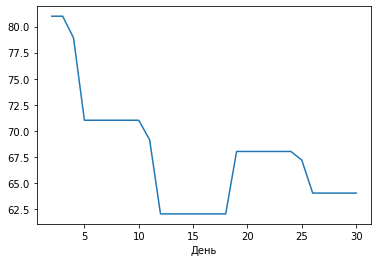

In [273]:
data_month = df_train[(df_train["Канал"] == "СТС") & (df_train["Месяц"] == "Май") & (df_train["Год"] == 2019)].groupby("День")
data_month["searches"].mean().plot()

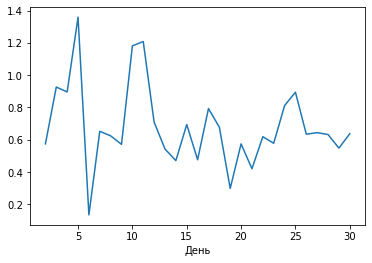

In [274]:
data_month[tvr_18].mean().plot()

In [276]:
np.corrcoef(data_month["searches"].mean(), data_month[tvr_18].mean())

array([[1.        , 0.24042285],
       [0.24042285, 1.        ]])

## Выходные дни

In [42]:
holidays = []
date_format = "%Y-%m-%d"

for year in [2018, 2019, 2020]:
    for day in range(1, 9):
        holidays.append(datetime.datetime.strptime("{1}-01-{0}".format(day, year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-02-23".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-03-08".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-05-01".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-05-09".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-06-12".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-11-04".format(year), date_format))

holidays_str = list(map(lambda x: datetime.datetime.strftime(x, date_format), holidays))

In [43]:
df_train["working_day"] = ~np.isin(df_train["day_datetime"], holidays_str)

In [44]:
df_train["working_day"] = ~(df_train["weekday"] >= 5)

In [45]:
df_train["working_day"].value_counts()

True     50495
False    19585
Name: working_day, dtype: int64

In [46]:
df_train[~df_train["working_day"]][tvr_18].mean(), df_train[df_train["working_day"]][tvr_18].mean()

(1.2513316313505252, 1.2402645806515527)

# Идеи:
<b> погода </b> <br />
статистика поисковых запросов <br />
курс валюты <br />
s&p 500 yahoo finance <br />
индекс самоизоляции